In [1]:
file_name ="../../knowledge_base/TelegramPosts.txt"
with open(file_name,"r", encoding="utf-8") as f:
    text = f.read()
text

'\ufeffПосты за 2021 год        5\nМой опыт инвестиций        5\nДавно не рассказывал про то, как бороться с бардаком в бизнесе, пора это исправить.        6\nИнвест новости прошедшей недели        6\n500% доходность на IPO 🙄        6\nКак получить большую аллокацию?        7\nСегодня подал заявки на участие в 3х #IPO        7\nИнвест новости прошедшей недели        7\nКак участвовать в IPO        7\nНе сравнивай месяц с месяцем 🙈        8\nВ Сколково проводится множество мероприятий каждый день. И о том как бизнес строить и как стартап питчить и о менеджменте и HR и множество другого полезного контента.        8\nВыход из кризиса в цифрах        8\nКуда я еще инвестирую?        8\nСервис для аренды пауэрбэнков «Бери заряд!» привлек 431 млн рублей от группы частных инвесторов, в ходе раунда компанию оценили в 1,35 млрд рублей.        9\nА еще на прошлой неделе        9\nНовости прошедшей недели        9\nКиллер фича от МегаФона, про которую ты скорее всего не знаешь        10\nКто хоче

In [4]:
ar = text.split("\n")


In [18]:
if ar[0][:1]=='\ufeff':
    ar[0]=ar[0][1:]
s=ar[0]
num =s[-4:].strip()
if num.isnumeric():
    n= int(num)
    print(n)

5


In [49]:
i_done=0
contents = []
for i, s in enumerate(ar):
    num:str = s[-4:].strip()
    if num.isnumeric():
        i_done = i
        n = int(num)
        item = (s[:-4].strip(),n)
        #print(item)
        contents.append(item)
    else:
        break

# print(ar[i_done+1:])

In [22]:
import re 
s = 'Посты за 2021 год'
m = re.search(r'Посты за (\d{4}) год',s)
print(m.group(1))


2021


In [26]:
def f(s):
    m = re.search(r'Посты за (\d{4}) год',s[0])
    return m
r= list(filter(f,contents))
print(r)

[('Посты за 2021 год', 5), ('Посты за 2022 год', 28), ('Посты за 2023 год', 57)]


In [50]:
ar_t = ar[i_done+1:]
text=[]
is_h = True
is_h2= False
h="##_"
rl = [x[0] for x in r]
for i, s in enumerate(ar_t):
    s=s.strip()
    if s=="":
        is_h=True
    elif s==h:
        is_h2=True
        is_h= False
    elif is_h:
        if s in rl:
            print(s)
        text.append('# '+s)
        is_h=False
    else:
        is_h = False
        if is_h2:
            is_h2=False
            text.append("## "+s)
        else:
            if s.startswith("#"):
                s=": "+s[1:]
            text.append(s)
out_file  ="../../knowledge_base/TelegramPosts.md"
with open(out_file,"w",encoding="utf-8") as f:
    f.write("\n".join(text))
# print("\n".join(text))
    

Посты за 2021 год
Посты за 2022 год
Посты за 2023 год


In [2]:
from langchain.text_splitter import MarkdownHeaderTextSplitter
import tiktoken
import matplotlib.pyplot as plt

def split_text( docs):
    headers_to_split_on = [
        ("#", "H1"),
        ("##", "H2"),
        ("###", "H3"),
    ]
    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
    fragments =[]
    for ix, text in enumerate(docs):
        items = markdown_splitter.split_text(text)
        for i in items:
            if "H2" in i.metadata:
                i.page_content = i.metadata["H2"]+"\n"+ i.page_content
            if "H1" in i.metadata:
                i.page_content = i.metadata["H1"]+"\n"+ i.page_content
            i.metadata["ix"]=ix
        fragments.extend( items)
    return fragments


def num_tokens_from_string( string: str, encoding_name: str= "cl100k_base") -> int:
    """Возвращает количество токенов в строке"""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

def hist(fragments):
    fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in fragments]
    plt.hist(fragment_token_counts, bins=20, alpha=0.5, label='Fragments')
    plt.title('Distribution of Fragment Token Counts')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()



In [3]:
out_file  ="../../knowledge_base/TelegramPosts.md"
with open(out_file,"r",encoding="utf-8") as f:
    text = f.read()

fragments = split_text([ text])

156


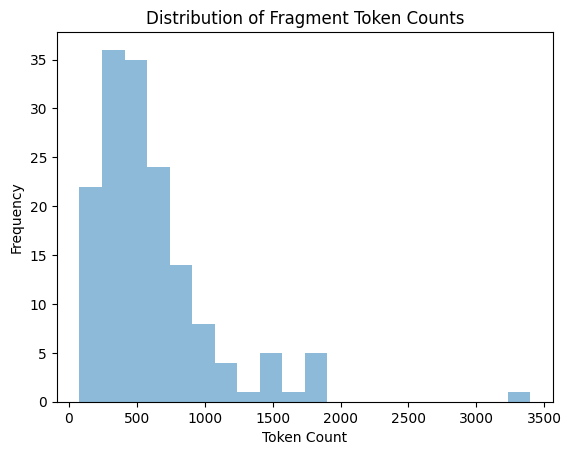

In [4]:
print(len(fragments))
hist(fragments)